# Linear Support Vector Classifier

Este es el caso más sencillo de un algoritmo SVM.

Lo que hará el algoritmo es intentar encajar los datos que le proporcionamos, devolviéndonos el mejor hiperplano separador para los datos. 

Una vez obtenido este, es posible que necesitemos añadir rasgos o elementos al clasificador para establecer que tipo de clase predecida nos ha llevado a cabo.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm

La librería `matplotlib` no es necesaria para llevar a cabo el SVC. La añadiremos como herramienta para visualizar los datos, que en un caso de SVM se vuelve crucial. En este caso se puede porque tendremos pocas dimensiones (variables), pero en los casos en los que las dimensiones sean más de 3, no será posible.

En primer lugar, determinamos los vectores que pasaremos al modelo.

In [6]:
X = [1,5,1.5,8,1,9]
Y = [2,8,1.8,8,0.6,11]

Veremos en la representación una forma intuitiva de seprar los datos linealmente.

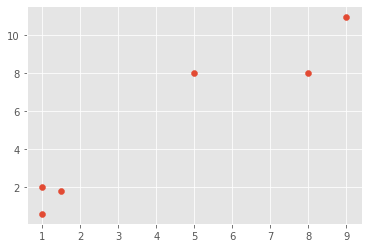

In [5]:
plt.scatter(X,Y)
plt.show()

Esto nos sirve para comprender la potencia del Machine Learning y algoritmos como el SVM. Mientras nosotros no somos capaces de visualizar en el espacio más de 3 dimensiones, un ordenador podrá representar y operar en espacios con una gran cantidad de dimensiones.

Como normalmente trabajaremos con conjuntos de datos, usaremos numpy para unir nuestros vectores.

In [7]:
data = np.array(list(zip(X,Y)))
data

array([[ 1. ,  2. ],
       [ 5. ,  8. ],
       [ 1.5,  1.8],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

A continuación, necesitaremos etiquetar cada una de las entradas por razones de entrenamiento.

En este tipo de problemas de Machine Learning supervisados, los datos que no estén correctamente etiquetados no se podrán usar. Necesitaremos, en este caso, que los puntos estén clasificados por grupos para tener un objetivo. Los etiquetaremos como 0 y 1.

In [8]:
target = [0, 1, 0, 1, 0, 1]

En nuestro ejercicio queremos tener una lista de rasgos numéricos para poder calcular diversos estadísticos y poder establecer una etiqueta dependiendo de si pertenecen o no pertenecen al segmento que queremos clasificar. Para ello creamos nuestro clasificador.

Recordemos que `C` es una forma de determinar como de mala queremos que sea la clasificación. En principio lo estableceremos como 1, pero habrá que irlo ajustando a medida que vayamos desarrollando el algoritmo.

In [11]:
classifier = svm.SVC(kernel='linear', C=1.0)
classifier.fit(data, target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

La fase de aprendizaje ya está lista. El modelo ha aprendido de nuestros datos. Ahora podemos tanto predecir como probar si un punto cualquiera dentro del espacio cae en la zona de 0 o en la zona de 1. 

Como ejemplo tomamos un punto que esté cerca de 0. El punto deberá estar en el formato adecuado, para ello usamos la función `reshape` (lo entramos como fila y lo cambiamos a columna).

In [13]:
p = np.array([0.57, 0.67])
print(p)
p = p.reshape(1,2)
print(p)

classifier.predict(p)

[0.57 0.67]
[[0.57 0.67]]


array([0])

Parece que el clasificador no ha tenido problemas a la hora de determinar que el punto caería en la categoría que hemos denominado como 0.

Ahora probamos con un punto más cercano al grupo 1.

In [14]:
p = np.array([10.32, 12.67]).reshape(1,2)
print(p)
classifier.predict(p)

[[10.32 12.67]]


array([1])

### Representación del soporte vectorial en 2D

Lo primero que tendremos que hacer es extraer los parámetros del modelo para poder representar el hiperplano separador que viene definido por ellos.

In [15]:
# Como es un array le indicamos [0] para quedarnos solo con el primer elemento
w = classifier.coef_[0]
w

array([0.1380943 , 0.24462418])

Con esto obtenemos los pesos para las dos categorías. Estos valores nos servirán para determinar la recta de la siguiente manera.

El modelo lineal está definido por la ecuación $w_0 · x + w_1 · y + e = 0$, donde `e` representa al término independiente.

El hiperplano en 2D viene definido por la ecuación $y = a * x + b$.

Despejaremos `y` de esta ecuación para obtener los parámetros.

In [17]:
a = -w[0]/w[1]
a

-0.5645161290322581

In [18]:
b = - classifier.intercept_[0]/w[1]
b

6.734677437813051

Si se tratara de `n` dimensiones sería exactamente igual pero con la diferencia de que `x` sería un vector `n dimensional` al igual que `a`, y, por tanto, `a · b` sería un producto escalar.

Generamos el vector de las `x` y el vector de las `y` y hacemos la representación.

In [19]:
xx = np.linspace(0,10)
yy = a * xx + b

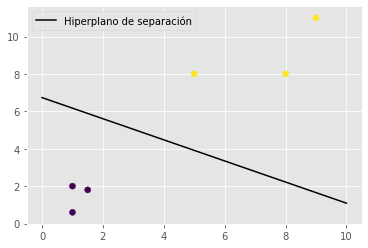

In [20]:
plt.plot(xx, yy, 'k-', label = 'Hiperplano de separación')
plt.scatter(X, Y, c = target)
plt.legend()
plt.show()

Es claro que en problemas con un número de dimensiones mayor a 3 este tipo de representación no será posible.